In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import time
import regex

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"G:\Datasets\Edge-IIoTset dataset\Selected dataset for ML and DL\ML-EdgeIIoT-dataset.csv", low_memory=False)

In [3]:
pd.set_option("display.max.rows", None)
pd.set_option('display.max_columns', None)

In [4]:
df.dtypes

frame.time                    object
ip.src_host                   object
ip.dst_host                   object
arp.dst.proto_ipv4            object
arp.opcode                   float64
arp.hw.size                  float64
arp.src.proto_ipv4            object
icmp.checksum                float64
icmp.seq_le                  float64
icmp.transmit_timestamp      float64
icmp.unused                  float64
http.file_data                object
http.content_length          float64
http.request.uri.query        object
http.request.method           object
http.referer                  object
http.request.full_uri         object
http.request.version          object
http.response                float64
http.tls_port                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
t

In [5]:
df['Attack_type'].value_counts()

Normal                   24301
DDoS_UDP                 14498
DDoS_ICMP                14090
Ransomware               10925
DDoS_HTTP                10561
SQL_injection            10311
Uploading                10269
DDoS_TCP                 10247
Backdoor                 10195
Vulnerability_scanner    10076
Port_Scanning            10071
XSS                      10052
Password                  9989
MITM                      1214
Fingerprinting            1001
Name: Attack_type, dtype: int64

In [6]:
df['Attack_type'] = df['Attack_type'].str.replace('DDoS_UDP','ddos')
df['Attack_type'] = df['Attack_type'].str.replace('DDoS_ICMP','ddos')
df['Attack_type'] = df['Attack_type'].str.replace('DDoS_TCP','ddos')
df['Attack_type'] = df['Attack_type'].str.replace('DDoS_HTTP','ddos')

In [7]:
df['Attack_type'] = df['Attack_type'].str.replace('XSS','injection')
df['Attack_type'] = df['Attack_type'].str.replace('SQL_injection','injection')
df['Attack_type'] = df['Attack_type'].str.replace('Uploading','injection')

In [8]:
df['Attack_type'] = df['Attack_type'].str.replace('MITM','mitm')

In [9]:
df['Attack_type'] = df['Attack_type'].str.replace('Password','malware')
df['Attack_type'] = df['Attack_type'].str.replace('Backdoor','malware')
df['Attack_type'] = df['Attack_type'].str.replace('Ransomware','malware')

In [10]:
df['Attack_type'] = df['Attack_type'].str.replace('Port_Scanning','scanning')
df['Attack_type'] = df['Attack_type'].str.replace('Fingerprinting','scanning')
df['Attack_type'] = df['Attack_type'].str.replace('Vulnerability_scanner','scanning')

In [11]:
df['Attack_type'].value_counts()

ddos         49396
malware      31109
injection    30632
Normal       24301
scanning     21148
mitm          1214
Name: Attack_type, dtype: int64

In [12]:
df=df.sample(frac = 1)

In [13]:
label_encoder = LabelEncoder()

In [14]:
df['Attack_type'] = label_encoder.fit_transform(df['Attack_type'])
df['Attack_type'] = df['Attack_type'].astype(int)

In [15]:
for i in df.columns:
    if(df[i].dtypes == object):
        df[i] = label_encoder.fit_transform(df[i])
        df[i] = df[i].astype(float)
    print(df[i].dtypes)

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
int64
int32


In [16]:
X = df.drop(columns=['Attack_type','Attack_label'])
y = df['Attack_label']
y1 = df['Attack_type']

In [17]:
X.dtypes

frame.time                   float64
ip.src_host                  float64
ip.dst_host                  float64
arp.dst.proto_ipv4           float64
arp.opcode                   float64
arp.hw.size                  float64
arp.src.proto_ipv4           float64
icmp.checksum                float64
icmp.seq_le                  float64
icmp.transmit_timestamp      float64
icmp.unused                  float64
http.file_data               float64
http.content_length          float64
http.request.uri.query       float64
http.request.method          float64
http.referer                 float64
http.request.full_uri        float64
http.request.version         float64
http.response                float64
http.tls_port                float64
tcp.ack                      float64
tcp.ack_raw                  float64
tcp.checksum                 float64
tcp.connection.fin           float64
tcp.connection.rst           float64
tcp.connection.syn           float64
tcp.connection.synack        float64
t

In [18]:
X.shape

(157800, 61)

In [19]:
X.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,icmp.unused,http.file_data,http.content_length,http.request.uri.query,http.request.method,http.referer,http.request.full_uri,http.request.version,http.response,http.tls_port,tcp.ack,tcp.ack_raw,tcp.checksum,tcp.connection.fin,tcp.connection.rst,tcp.connection.syn,tcp.connection.synack,tcp.dstport,tcp.flags,tcp.flags.ack,tcp.len,tcp.options,tcp.payload,tcp.seq,tcp.srcport,udp.port,udp.stream,udp.time_delta,dns.qry.name,dns.qry.name.len,dns.qry.qu,dns.qry.type,dns.retransmission,dns.retransmit_request,dns.retransmit_request_in,mqtt.conack.flags,mqtt.conflag.cleansess,mqtt.conflags,mqtt.hdrflags,mqtt.len,mqtt.msg_decoded_as,mqtt.msg,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id
92059,91824.0,8154.0,3506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,1.0,2.0,1.0,3.0,0.0,0.0,1280865.0,2.693336e+09,10194.0,0.0,0.0,0.0,0.0,60210.0,16.0,1.0,0.0,15180.0,0.0,1.0,14154.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
30461,104491.0,8154.0,3506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,12.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.000000e+00,58123.0,0.0,0.0,1.0,0.0,80.0,2.0,0.0,0.0,69708.0,0.0,0.0,14045.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
115505,85606.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,1.0,2.0,1.0,3.0,0.0,0.0,669424.0,2.372294e+09,36531.0,0.0,0.0,0.0,0.0,60944.0,24.0,1.0,1440.0,0.0,3378.0,184892386.0,25779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49498,59617.0,17307.0,3506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,1.0,2.0,1.0,3.0,0.0,0.0,828761672.0,8.287617e+08,27833.0,0.0,0.0,1.0,0.0,80.0,2.0,0.0,120.0,1.0,19940.0,0.0,13798.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
51999,62553.0,9349.0,3506.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,13.0,1.0,2.0,1.0,3.0,0.0,0.0,828696699.0,8.286967e+08,509.0,0.0,0.0,1.0,0.0,80.0,2.0,0.0,120.0,1.0,19940.0,0.0,2835.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [1]:
model = ExtraTreesClassifier()

NameError: name 'ExtraTreesClassifier' is not defined

In [21]:
model.fit(X1,y1)

ExtraTreesClassifier()

In [22]:
for i in model.feature_importances_:
    if i <= 0:
        print('ok')
print(model.feature_importances_)

ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
ok
[3.26129229e-03 7.29307090e-03 1.74893482e-03 2.31427929e-05
 2.84556910e-06 8.80193259e-07 8.61449390e-04 3.73825900e-04
 7.59859094e-04 0.00000000e+00 0.00000000e+00 2.02125541e-04
 1.23687454e-04 1.12313355e-05 7.52954404e-03 2.25618138e-03
 5.63666649e-04 8.50895249e-03 1.00532420e-04 0.00000000e+00
 5.20467034e-05 9.95745269e-04 1.50637702e-03 2.97954295e-04
 4.10193187e-03 9.41832290e-04 1.44412916e-03 1.59302989e-02
 4.22418611e-03 7.34758359e-03 1.08360338e-03 1.01809153e-02
 1.37720286e-03 6.78990789e-03 5.32586428e-03 2.67451020e-05
 1.76741922e-04 2.48117641e-05 1.45439557e-05 9.74415531e-02
 0.00000000e+00 0.00000000e+00 1.94106121e-06 0.00000000e+00
 0.00000000e+00 1.74603915e-01 4.54602989e-03 4.43252020e-03
 2.02927935e-02 1.15724548e-02 0.00000000e+00 9.11222199e-02
 2.19874748e-02 4.34592481e-03 2.45750420e-01 2.18555491e-01
 3.91752240e-03 5.96609533e-03 0.00000000e+00 0.00000000e+00
 0.00000000e+00]


In [23]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

In [24]:
feat_importances

frame.time                   3.261292e-03
ip.src_host                  7.293071e-03
ip.dst_host                  1.748935e-03
arp.dst.proto_ipv4           2.314279e-05
arp.opcode                   2.845569e-06
arp.hw.size                  8.801933e-07
arp.src.proto_ipv4           8.614494e-04
icmp.checksum                3.738259e-04
icmp.seq_le                  7.598591e-04
icmp.transmit_timestamp      0.000000e+00
icmp.unused                  0.000000e+00
http.file_data               2.021255e-04
http.content_length          1.236875e-04
http.request.uri.query       1.123134e-05
http.request.method          7.529544e-03
http.referer                 2.256181e-03
http.request.full_uri        5.636666e-04
http.request.version         8.508952e-03
http.response                1.005324e-04
http.tls_port                0.000000e+00
tcp.ack                      5.204670e-05
tcp.ack_raw                  9.957453e-04
tcp.checksum                 1.506377e-03
tcp.connection.fin           2.979

<AxesSubplot:>

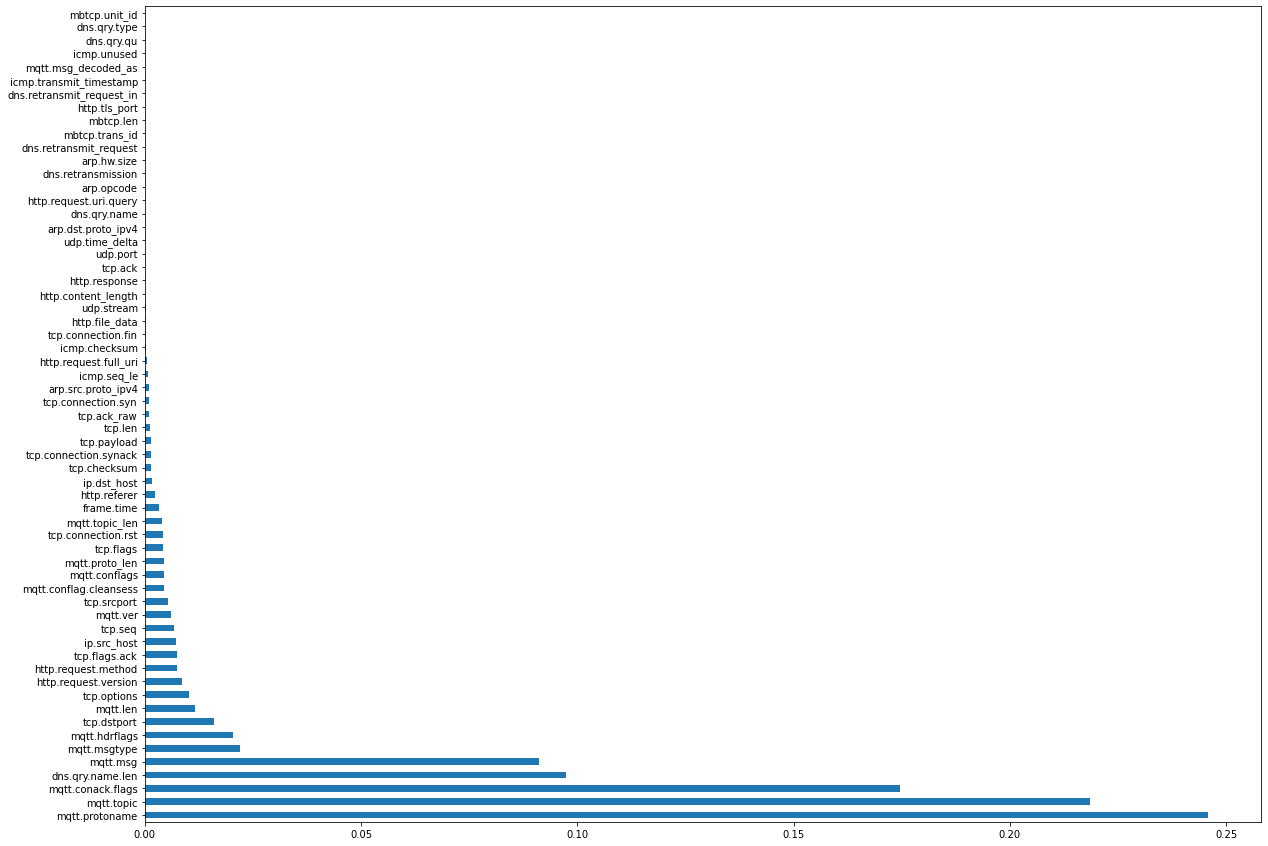

In [25]:
feat_importances.nlargest(80).plot(kind='barh',figsize=(20, 15)) 

In [26]:
y1.value_counts()

1    49396
3    31109
2    30632
0    24301
5    21148
4     1214
Name: Attack_type, dtype: int64

In [27]:
X=X.drop(columns=['icmp.transmit_timestamp','icmp.unused','http.content_length','http.tls_port','dns.qry.qu','dns.qry.type','dns.retransmit_request','dns.retransmit_request_in','mqtt.msg_decoded_as','mbtcp.len','mbtcp.trans_id','mbtcp.unit_id'])

In [28]:
#Normalization of dataset

In [29]:
X.shape

(157800, 49)

In [30]:
X=((X-X.min())/(X.max()-X.min()))*1

In [31]:
X = np.array(X, dtype=float)

In [32]:
X = X.reshape(157800, 49, 1)

In [33]:
X.shape

(157800, 49, 1)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y1, test_size=0.2,stratify=y1)

In [35]:
X_train.shape

(126240, 49, 1)

In [36]:
y_train.value_counts()

1    39517
3    24887
2    24506
0    19441
5    16918
4      971
Name: Attack_type, dtype: int64

In [37]:
X_test.shape

(31560, 49, 1)

In [38]:
y_test.value_counts()

1    9879
3    6222
2    6126
0    4860
5    4230
4     243
Name: Attack_type, dtype: int64

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
import time
import regex

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU, RNN, SimpleRNN
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import metrics
import numpy as np
import seaborn as sn
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import keras
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D , AveragePooling1D

from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM, GRU
import matplotlib.pyplot as plt
from sklearn import metrics
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras.utils.vis_utils import plot_model

from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from scipy.stats import zscore
from sklearn.model_selection import KFold

In [ ]:
############################################
###########################################
##
##      Proposed Model----- Self-Attention Deep CNN
##
############################################
###########################################

In [46]:
input_shape = X.shape[1:]

In [47]:
# 1 cn+ 1pl

In [48]:
def proposed_model():
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=7, num_heads=8)(x, x)

    res = x + inputs
    x = layers.Conv1D(25, 3, activation="relu")(res)
    x = layers.MaxPooling1D(pool_size=(4))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dense(6, activation="softmax")(x)

    return keras.Model(inputs, x)


model = proposed_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 6).history

Epoch 1/6
3945/3945 [==============================] - 83s 21ms/step - loss: 0.6381 - accuracy: 0.7786
Epoch 2/6
3945/3945 [==============================] - 82s 21ms/step - loss: 0.0927 - accuracy: 0.9717
Epoch 3/6
3945/3945 [==============================] - 82s 21ms/step - loss: 0.0513 - accuracy: 0.9846
Epoch 4/6
3945/3945 [==============================] - 81s 21ms/step - loss: 0.0347 - accuracy: 0.9883
Epoch 5/6
3945/3945 [==============================] - 81s 21ms/step - loss: 0.0253 - accuracy: 0.9907
Epoch 6/6
3945/3945 [==============================] - 81s 21ms/step - loss: 0.0200 - accuracy: 0.9926


In [49]:
hist_df = pd.DataFrame(history) 

# and save to csv: 
hist_csv_file = 'G:/Training Results/proposed/ML_b_1cn1pl.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [50]:
vd_preds_G = model.predict(X_test).argmax(axis=1)
con_G=confusion_matrix(y_test, vd_preds_G)
print(con_G)
print("Precision: ",precision_score(y_test,vd_preds_G,average='macro'))
print("Recall: ", recall_score(y_test,vd_preds_G,average='macro'))
print("F1-score: ", f1_score(y_test,vd_preds_G,average='macro'))
print("Accuracy: ", accuracy_score(y_test,vd_preds_G))

[[4860    0    0    0    0    0]
 [   0 9857    0    3    1   18]
 [   0    5 6110    0    0   11]
 [   0    0    3 6040    0  179]
 [   0    0    0    0  243    0]
 [   0    1    4    3    0 4222]]
Precision:  0.9910339942931458
Recall:  0.9940031563064938
F1-score:  0.9923971678054787
Accuracy:  0.9927756653992396


In [51]:
# 2 cn+ 1pl

In [91]:
def proposed_model():
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=7, num_heads=8)(x, x)

    res = x + inputs
    x = layers.Conv1D(25, 3, activation="relu")(res)
    x = layers.Conv1D(25, 3, activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=(4))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dense(6, activation="softmax")(x)

    return keras.Model(inputs, x)


model = proposed_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs = 6).history

Epoch 1/6
3945/3945 [==============================] - 102s 25ms/step - loss: 0.4312 - accuracy: 0.8408
Epoch 2/6
3945/3945 [==============================] - 99s 25ms/step - loss: 0.0621 - accuracy: 0.9816
Epoch 3/6
3945/3945 [==============================] - 96s 24ms/step - loss: 0.0412 - accuracy: 0.9873
Epoch 4/6
3945/3945 [==============================] - 96s 24ms/step - loss: 0.0318 - accuracy: 0.9895
Epoch 5/6
3945/3945 [==============================] - 98s 25ms/step - loss: 0.0240 - accuracy: 0.9916
Epoch 6/6
3945/3945 [==============================] - 97s 24ms/step - loss: 0.0219 - accuracy: 0.9923


In [92]:
hist_df = pd.DataFrame(history) 

# and save to csv: 
hist_csv_file = 'G:/Training Results/proposed/ML_b_2cn1pl.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [93]:
vd_preds_G = model.predict(X_test).argmax(axis=1)

print("Precision: ",precision_score(y_test,vd_preds_G,average='macro'))
print("Recall: ", recall_score(y_test,vd_preds_G,average='macro'))
print("F1-score: ", f1_score(y_test,vd_preds_G,average='macro'))
print("Accuracy: ", accuracy_score(y_test,vd_preds_G))

Precision:  0.994500696745981
Recall:  0.995588295042019
F1-score:  0.9950237224950816
Accuracy:  0.9949302915082383


In [ ]:
# 2 cn+ 2pl

In [55]:
def proposed_model():
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=7, num_heads=8)(x, x)

    res = x + inputs
    x = layers.Conv1D(25, 3, activation="relu")(res)
    x = layers.MaxPooling1D(pool_size=(4))(x)

    x = layers.Conv1D(13, 3, activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=(2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(30, activation="relu")(x)
    x = layers.Dense(6, activation="softmax")(x)

    return keras.Model(inputs, x)


model = proposed_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs = 6).history

Epoch 1/6
3945/3945 [==============================] - 86s 21ms/step - loss: 0.6594 - accuracy: 0.76360s - loss: 0.6595 - accuracy: 0.76
Epoch 2/6
3945/3945 [==============================] - 83s 21ms/step - loss: 0.1134 - accuracy: 0.9626
Epoch 3/6
3945/3945 [==============================] - 91s 23ms/step - loss: 0.0629 - accuracy: 0.9800
Epoch 4/6
3945/3945 [==============================] - 101s 26ms/step - loss: 0.0477 - accuracy: 0.9844
Epoch 5/6
3945/3945 [==============================] - 102s 26ms/step - loss: 0.0380 - accuracy: 0.9873
Epoch 6/6
3945/3945 [==============================] - 102s 26ms/step - loss: 0.0344 - accuracy: 0.9879


In [56]:
hist_df = pd.DataFrame(history) 

# and save to csv: 
hist_csv_file = 'G:/Training Results/proposed/ML_b_2cn2pl.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [57]:
vd_preds_G = model.predict(X_test).argmax(axis=1)
con_G=confusion_matrix(y_test, vd_preds_G)
print(con_G)
print("Precision: ",precision_score(y_test,vd_preds_G,average='macro'))
print("Recall: ", recall_score(y_test,vd_preds_G,average='macro'))
print("F1-score: ", f1_score(y_test,vd_preds_G,average='macro'))
print("Accuracy: ", accuracy_score(y_test,vd_preds_G))

[[4859    1    0    0    0    0]
 [   0 9814    1    1    0   63]
 [   0    0 6116    0    0   10]
 [   0    2   14 6121    0   85]
 [   0    0    0    0  243    0]
 [   0   19   34  108    0 4069]]
Precision:  0.9891567469275152
Recall:  0.989548008415755
F1-score:  0.9893498287283468
Accuracy:  0.9892902408111534


In [ ]:
# 4 cn+ 2pl

In [58]:
def proposed_model():
    inputs = keras.Input(shape=input_shape)
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(key_dim=7, num_heads=8)(x, x)

    res = x + inputs
    x = layers.Conv1D(26, 3, activation="relu")(res)
    x = layers.Conv1D(25, 3, activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=(4))(x)

    x = layers.Conv1D(10, 3, activation="relu")(x)
    x = layers.Conv1D(8, 3, activation="relu")(x)
    x = layers.MaxPooling1D(pool_size=(2))(x)

    x = layers.Flatten()(x)
    x = layers.Dense(32, activation="relu")(x)
    x = layers.Dense(6, activation="softmax")(x)

    return keras.Model(inputs, x)


model = proposed_model()
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [59]:
history = model.fit(X_train, y_train, epochs = 6).history

Epoch 1/6
3945/3945 [==============================] - 119s 30ms/step - loss: 0.6146 - accuracy: 0.7618
Epoch 2/6
3945/3945 [==============================] - 116s 29ms/step - loss: 0.0864 - accuracy: 0.9711
Epoch 3/6
3945/3945 [==============================] - 118s 30ms/step - loss: 0.0444 - accuracy: 0.9837
Epoch 4/6
3945/3945 [==============================] - 116s 29ms/step - loss: 0.0326 - accuracy: 0.9872
Epoch 5/6
3945/3945 [==============================] - 116s 29ms/step - loss: 0.0251 - accuracy: 0.9899
Epoch 6/6
3945/3945 [==============================] - 116s 29ms/step - loss: 0.0230 - accuracy: 0.9903


In [60]:
hist_df = pd.DataFrame(history) 

# and save to csv: 
hist_csv_file = 'G:/Training Results/proposed/ML_b_4cn2pl.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [61]:
vd_preds_G = model.predict(X_test).argmax(axis=1)

print("Precision: ",precision_score(y_test,vd_preds_G,average='macro'))
print("Recall: ", recall_score(y_test,vd_preds_G,average='macro'))
print("F1-score: ", f1_score(y_test,vd_preds_G,average='macro'))
print("Accuracy: ", accuracy_score(y_test,vd_preds_G))

Precision:  0.9919972267223507
Recall:  0.9904080169115836
F1-score:  0.9911283464518909
Accuracy:  0.9914131812420786


In [ ]:
#################################################################################################